We consider a circuit of the form

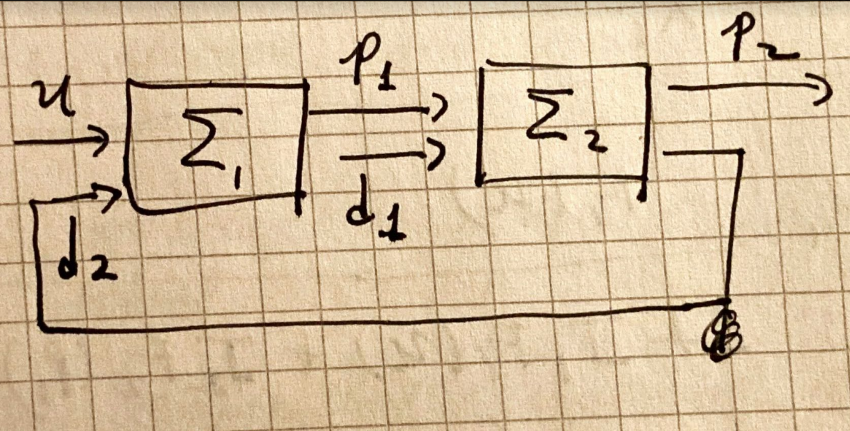

The dynamics are given by

$\dot p_i = \frac{\alpha_i}{J_i} \frac{d_i}{1 + d_1 + d_2} - \delta p_i$

Assuming that there is a constant $c$ such that $\alpha_i = c J_i$, the steady-state behavior is

$\frac{\delta}{c} p_i = \frac{d_i}{1 + d_1 + d_2}$

We set $\frac{\delta}{c} = 1$ and thus get

$ p_i = \frac{d_i}{1 + d_1 + d_2}$

The relation between the $d_i$ and the $J_i$ is given by

$d_1 = J_1 F_1(u)$

$d_2 = J_2 F_2(p_1)$

We will assume that the $F_i$ are monotonically increasing.

We would like to state two requirements for our circuit:
- When the input $u$ exceeds a threshold $u^H$, the output $p_2$ should exceed a threshold $p_{2}^{H}$
- When the input $u$ is below a threshold $u^L$, the output $p_2$ should be below a threshold $p_{2}^{L}$.

### Upper threshold

- In addition to $p_2$ having a lower threshold $p_2^{H}$, we will assume it does not exceed a maximum value $p_{2}^{max}$.
- We will assume that $p_1$ must exceed a lower threshold $p_{1}^{H}$ and that it has a maximum value $p_{1}^{max}$.
- We will assume $u^{max}$ is the max value of $u$.

From the previous equations, we have two constraints:

$\frac{d_i}{1 + d_1 + d_2} \ge p_{i}^{H}$

which becomes

$-d_i + p_{i}^{H} d_1 + p_{i}^{H} d_2 \le -p_{i}^{H}$

Moreover, we have the constraints

$J_1 F_1(u^{max}) \ge d_1 \ge J_1 F_1(u^H)$

$J_2 F_2(p_1^{max}) \ge d_2 \ge J_2 F_2(p_1^H)$

We model the problem as follows:

== Missing spec
InVars: [J1, J2]
OutVars:[]
A: [
  -J1 <= 0
  -0.1 J2 <= 0
]
G: [
  3 J1 - 1.6 J2 <= -0.6
]


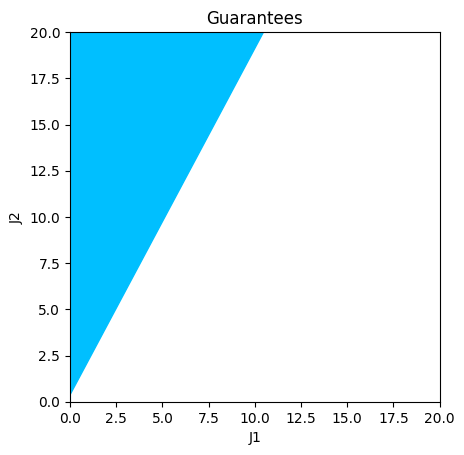

In [1]:
## constants
# sigma 1
F_1_u_max = 5
F_1_u_H = 4
# sigma 2
p2_H = 0.6
F_2_p_1_max = 4.1
F_2_p_1_H = 4


from pacti.contracts import PolyhedralIoContract
from pacti.utils import plots
from pacti.iocontract import Var

top_level_objective = PolyhedralIoContract.from_strings(
    input_vars=[],
    output_vars=["d1", "d2"],
    assumptions=[],
    guarantees=[
    f"{p2_H} d1  {-1 + p2_H} d2 <= -{p2_H}"
    ]
    )

sigma1 = PolyhedralIoContract.from_strings(
    input_vars=["d2"],
    output_vars=["d1", "J1"],
    assumptions=[],
    guarantees=[
    f"d1 - {F_1_u_max} J1  <= 0",
    f"{F_1_u_H} J1 - d1 <= 0"
    ],
    )

sigma2 = PolyhedralIoContract.from_strings(
    input_vars=["d1"],
    output_vars=["d2", "J2"],
    assumptions=[],
    guarantees=[
    f"d2 - {F_2_p_1_max} J2  <= 0",
    f"{F_2_p_1_H} J2 - d2 <= 0"
    ]
    )

system_spec = sigma1.compose(sigma2,vars_to_keep=["d1","d2"])

system_H_threshold = top_level_objective.quotient(system_spec)
print(f"== Missing spec\n{system_H_threshold}")

_ = plots.plot_guarantees(contract=system_H_threshold,x_var=Var("J1"),y_var=Var("J2"),x_lims=(0,20),y_lims=(0,20),var_values={})


### Lower thresholds

- In addition to $p_2$ having a lower threshold $p_{2}^{L}$, we will assume it does not go below a minimum value $p_{2}^{min}$.
- We will assume that $p_1$ must be below a threshold $p_{1}^{L}$ and that it has a minimum value $p_{1}^{min}$.
- We will assume $u^{min}$ is the min value of $u$.

From the steady-state dynamics, we have the expressions

$\frac{d_i}{1 + d_1 + d_2} \le  p_{i}^{L}$

which becomes

$d_i - p_{i}^{L} d_1 - p_{i}^{L} d_2 \le p_{i}^{L}$

Moreover, we have the constraints

$J_1 F_1(u^{L}) \ge d_1 \ge J_1 F_1(u^{min})$

$J_2 F_2(p_1^{L}) \ge d_2 \ge J_2 F_2(p_1^{min})$

As before, we model the problem as

== Missing spec
InVars: [J1, J2]
OutVars:[]
A: [
  -2 J1 <= 0
  -0.1 J2 <= 0
]
G: [
  0.06 J2 <= 0.4
]


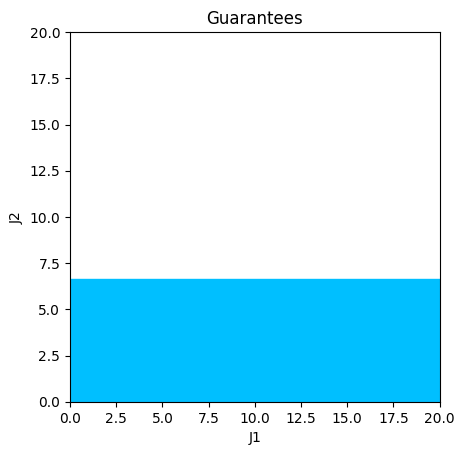

In [2]:
# sigma 1
F_1_u_min = 0
F_1_u_L = 2
# sigma 2
p2_L = 0.4
F_2_p_1_min = 0
F_2_p_1_L = 0.1



top_level_objective_L = PolyhedralIoContract.from_strings(
    input_vars=[],
    output_vars=["d1", "d2"],
    assumptions=[],
    guarantees=[
    f"-{p2_L} d1  + {1 - p2_L} d2 <= {p2_L}"
    ]
    )

sigma1_L = PolyhedralIoContract.from_strings(
    input_vars=["d2"],
    output_vars=["d1", "J1"],
    assumptions=[],
    guarantees=[
    f"d1 - {F_1_u_L} J1  <= 0",
    f"{F_1_u_min} J1 - d1 <= 0"
    ],
    )

sigma2_L = PolyhedralIoContract.from_strings(
    input_vars=["d1"],
    output_vars=["d2", "J2"],
    assumptions=[],
    guarantees=[
    f"d2 - {F_2_p_1_L} J2  <= 0",
    f"{F_2_p_1_min} J2 - d2 <= 0"
    ]
    )

system_spec_L = sigma1_L.compose(sigma2_L,vars_to_keep=["d1","d2"])
system_L_threshold = top_level_objective_L.quotient(system_spec_L)
print(f"== Missing spec\n{system_L_threshold}")

_ = plots.plot_guarantees(contract=system_L_threshold,x_var=Var("J1"),y_var=Var("J2"),x_lims=(0,20),y_lims=(0,20),var_values={})


The following plot shows the feasible region of the $J_i$ that will allow the circuit to meet its lower and upper thresholds.

== Overall spec
InVars: [J1, J2]
OutVars:[]
A: [
  -2 J1 <= 0
  -0.1 J2 <= 0
  -J1 <= 0
  -0.1 J2 <= 0
]
G: [
  0.06 J2 <= 0.4
  3 J1 - 1.6 J2 <= -0.6
]


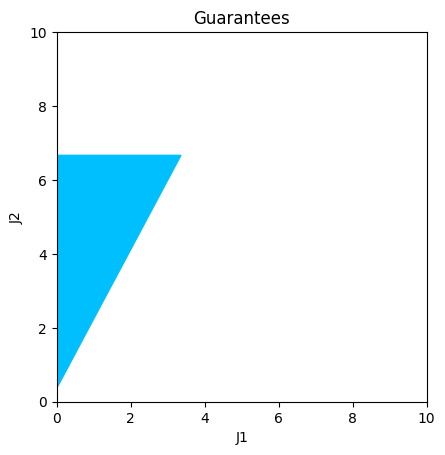

In [3]:
# We merge the upper and lower requirements to obtain J parameters that would ensure that the system meets both thresholds
overall_system = system_L_threshold.merge(system_H_threshold)
print(f"== Overall spec\n{overall_system}")
_ = plots.plot_guarantees(contract=overall_system,x_var=Var("J1"),y_var=Var("J2"),x_lims=(0,10),y_lims=(0,10),var_values={})